**NCAA Basketball Graphing Assignment**
===================================
--------------------------------------------------------------

In [1]:
from          bs4 import BeautifulSoup
import        requests, pandas as pd, csv  
import        numpy as np
import        matplotlib.pyplot as plt

## <font color='purple'> ***Scraping The Statistics*** </font>

In [2]:
# Data from https://www.ncaa.com/rankings/basketball-men/d1/ncaa-mens-basketball-net-rankings
url = 'https://www.ncaa.com/rankings/basketball-men/d1/ncaa-mens-basketball-net-rankings'
my_head = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=my_head)

soup = BeautifulSoup(response.content, 'html.parser')
team_stats = soup.find_all('table', class_ = 'sticky')[0]

basketballGameData = []
for row in team_stats.find_all('tr'):
    anon_team = [cell.text for cell in row.find_all('td')[1:8]]
    basketballGameData.append(anon_team)

# Putting it into a CSV file
with open('AlgorithmReferenceData.csv', 'w') as someFile:
    
    fields = ['Rank', 'School', 'Conference', 'Record', 'Road', 'Neutral', 'Home']
    csv_write = csv.DictWriter(someFile, fieldnames=fields, delimiter=',')
    csv_write.writeheader()
    
    for plData in basketballGameData[1::]:
        # Some unknown terminology 
        rec = int(plData[3].split('-')[0]) + int(plData[3].split('-')[1]) / 2
        road = int(plData[4].split('-')[0]) + int(plData[4].split('-')[1]) / 2
        neutral = int(plData[5].split('-')[0]) + int(plData[4].split('-')[1]) / 2
        home = int(plData[6].split('-')[0]) + int(plData[6].split('-')[1]) / 2

        # Input file for pandas
        inputDt = {'Rank': int(plData[0]), 
                   'School': plData[1],
                   'Conference': plData[2],
                   'Record': rec,
                   'Road' : road,
                   'Neutral': neutral,
                   'Home': home}

        csv_write.writerow(inputDt)

In [3]:
# Get data off of the brackets, (x VS y)
brackets_url = 'https://www.ncaa.com/brackets/basketball-men/d1'
bracket_response = requests.get(brackets_url, headers=my_head)

brack_soup = BeautifulSoup(bracket_response.content, 'html.parser')
topTeams = []

for num in range(301, 317):
    brack_stats = brack_soup.find(id=str(num))
    anon_team = [east.text for east in brack_stats.find_all('span', class_ = 'name')]
    topTeams.append(anon_team)

# Setting up some stuff
newList = []
df = pd.read_csv('AlgorithmReferenceData.csv')

df['EvaluationPoint'] = df.iloc[:, 3:7].sum(axis=1)
_schoollst = df['School'].tolist()

def getSchoolIndex(schoolName):
    if schoolName not in _schoollst: return 40
    else: return df[df.School == str(schoolName)].index[0]

# tryna make the code look longer LOL
def splitList(l, n : int):
    for i in range(0, len(l), n):
        yield l[i:i+n] 

tm = len(topTeams)
while tm > 2:
    for teamLen in range(tm):
        a, b = topTeams[teamLen][0].strip(), topTeams[teamLen][1].strip()
        if b == 'Mich. St.': b = 'Michigan St.'

        a_eval = df['EvaluationPoint'][getSchoolIndex(a)]
        b_eval = df['EvaluationPoint'][getSchoolIndex(b)]

        newList.append(a if a_eval > b_eval else b)

    # Clear the topTeams
    topTeams.clear()
    topTeams = list(splitList(newList, 2))
    newList.clear()
    tm = len(topTeams)

## <font color='purple'> ***Making A Graph Using Matplotlib*** </font>

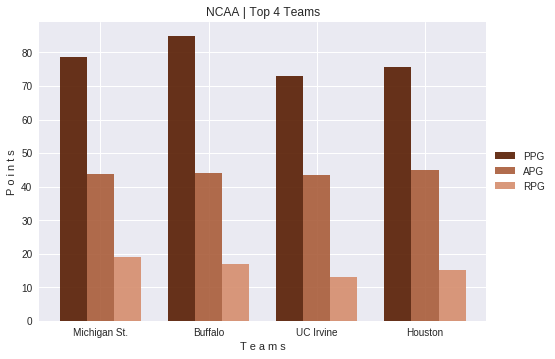

In [113]:
# Web scraping this data would be too much of a pain..
Teams = 'Michigan St.', 'Buffalo', 'UC Irvine', 'Houston'
data = [[78.7, 84.9, 72.9, 75.6], 
        [18.9, 16.9, 13.1, 15.1], 
        [43.7, 44.1, 43.5, 45.1]]

x = np.arange(len(Teams))

plt.style.use('seaborn')
plt.bar(x + 0.1, data[0], width=0.25, color='#581D02', label='PPG', alpha=0.9)
plt.bar(x + 0.35, data[2], width=0.25, color='#A95C39', label='APG', alpha=0.9)
plt.bar(x + 0.60, data[1], width=0.25, color='#D58D6D', label='RPG', alpha=0.9)

plt.ylabel('P o i n t s')
plt.xlabel('T e a m s')
plt.title('NCAA | Top 4 Teams')
plt.xticks(x + width, Teams)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [115]:
topTeams

[['Michigan St.', 'Buffalo'], ['UC Irvine', 'Houston']]